# 가섬검정시 주의사항

## 재현 가능성(Replicability)
같은 연구/실험을 다시 해도 비슷한 결과가 나오는 정도다.

개념설명
- 한 번 나온 결과가 “운”이 아니라 믿을 만한 결과인지 보려면, 다시 해도 비슷하게 나와야 한다.
- 재현이 잘 될수록 실험의 신뢰성이 올라간다.

예시설명
- 신약이 한 실험실에서만 좋게 나온 게 아니라, 다른 조건에서도 비슷한 효과가 반복되면 신뢰가 올라간다.
- 어떤 분석 결과가 다른 연구자가 같은 데이터/방법으로 돌려도 같은 결론이 나오면 재현성이 높다.

- 재현성 위기: 기존 결과를 다시 실험해보면 똑같이 안 나오는 사례가 많아진 문제 상황

### 재현이 어려운 이유
현실에서 '완전히 같은 실험'을 다시 하는 게 어렵다.

- 실험 환경, 대상, 측정 방식이 미세하게 달라지면 결과도 달라질 수 있다.
- 가설검정도 검정력이 100%가 아니라서 오차가 생길 수 있다.

## 재현성을 떨어뜨리는 경우

> 가설 자체가 엉성하면 우연히 유의가 떠도 진짜일 가능성이 낮아진다.<br>때문에 좋은 가설을 설정하는것이 중요하다

### p-해킹
p값이 0.05 이하가 나오게 하려고 분석을 반복/조정하는 행위

개념설명
- 유의미한 결과를 얻기 위해 변수를 이것저것 바꾸거나, 조건을 바꾸거나, 분석을 계속 시도한다.
- 이렇게 하면 우연히 “유의”가 뜬 결과를 잡아내기 쉬워져서 결과 신뢰성이 떨어진다.

예시설명
- 변수 조합을 계속 바꾸다가 p<0.05가 나온 경우만 채택한다.
- 여러 가설 검정을 계속 돌려서 유의한 것만 남긴다.

### 선택적 보고
유의미한 결과만 공개하고, 유의미하지 않은 결과는 숨기는 행위다.

개념설명
- 많은 분석 중 “잘 나온 결과”만 보고하면 전체 그림이 왜곡된다.
- 그래서 결과 해석이 과장되거나 잘못될 수 있다.

예시설명
- 실험 10개 중 1개만 유의하게 나왔는데, 그 1개만 보고서에 적는다.
- 여러 조건을 돌려놓고 가장 좋아 보이는 조건만 발표한다

### 자료수집 중단 시점 결정
원하는 결과가 나올 때까지 데이터를 더 모으면 p값이 ‘운 좋게’ 0.05 아래로 떨어질 수 있다.

개념설명
- 수집을 시작하기 전에 “언제 멈출지”를 정하지 않으면, 결과를 보면서 표본을 계속 늘리는 일이 생긴다.
- 이러한 행위는 신뢰성을 떨어트린다.

예시
- 50명 모으기로 했는데 유의가 안 나오자 100명까지 늘려서 p<0.05가 되는 순간 멈춘다.

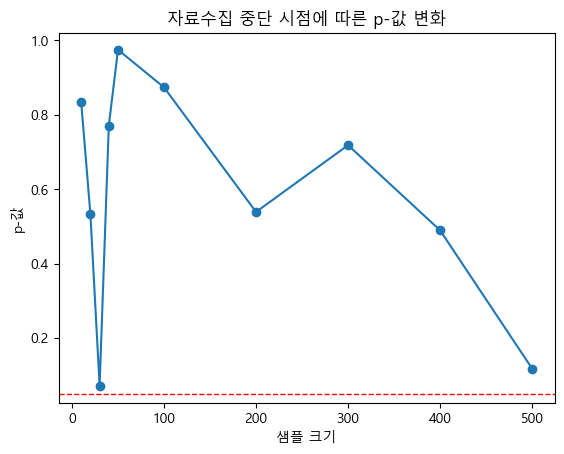

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(42)
data = np.random.normal(0, 1, 1000)
sample_sizes = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
p_values = []

for size in sample_sizes:
    sample = np.random.choice(data, size)
    _, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# p-값 시각화
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(y=0.05, color='red', linestyle='dashed', linewidth=1)
plt.title('자료수집 중단 시점에 따른 p-값 변화')
plt.xlabel('샘플 크기')
plt.ylabel('p-값')
plt.show()

### 데이터 탐색과 검증 분리란 무엇인가?
탐색으로 가설을 만들고, 검증은 ‘별도의 독립된 데이터’로 하는 방식

개념설명
- 같은 데이터로 “가설 만들기”와 “가설 검증”을 동시에 하면 우연에 과적합(과대해석)하기 쉽다.
- 그래서 탐색용과 검증용을 분리해 결과 신뢰성을 높인다.

예시설명
- 데이터셋을 탐색용(train)과 검증용(test)으로 나눠 사용한다.
- 탐색으로 후보를 고른 뒤, 새로 모은 데이터로 다시 확인한다.

# 문제풀이

1. 재현 가능성(reproducibility)에 대한 설명으로 옳은 것을 고르세요.
    1) 재현 가능성은 동일한 연구자가 동일한 실험을 여러 번 수행하여 동일한 결과를 얻는 것을 의미한다.
    2) 재현 가능성은 다른 연구자가 동일한 실험 절차를 따라 실험을 수행하여 동일한 결과를 얻는 것을 의미한다.
    3) 재현 가능성은 데이터 분석 과정에서 발생하는 오류를 줄이기 위한 방법이다.
    4) 재현 가능성은 통계 분석의 정확성을 평가하는 기준이다.

2번

2. p-해킹(p-hacking)의 정의에 가장 가까운 것을 고르세요.
    1) 통계 분석에서 발생하는 오류를 수정하는 과정
    2) 연구자가 원하는 결과를 얻기 위해 데이터를 반복적으로 분석하고 p-value를 조작하는 행위
    3) 데이터를 시각화하여 결과를 해석하는 과정
    4) 데이터를 수집하고 분석하는 표준 절차

2번

3. 선택적 보고(selective reporting)이 문제인 이유로 가장 적절한 것을 고르세요.
    1) 연구자가 모든 데이터를 수집하지 못할 수 있다.
    2) 연구자가 연구 결과를 왜곡하여 보고할 수 있다.
    3) 연구자가 데이터를 분석하는 방법을 모를 수 있다.
    4) 연구자가 통계적 방법을 사용할 수 없다.

2번

4. 자료수집 중단 시점을 결정할 때 발생할 수 있는 문제는 무엇인가요?
    1) 데이터 수집 비용이 증가한다.
    2) 데이터의 신뢰도가 높아진다.
    3) 연구자의 편향이 결과에 영향을 미칠 수 있다.
    4) 데이터의 다양성이 감소한다.

3번

5. 데이터 탐색(exploration)과 검증(validation)을 분리하는 이유로 가장 적절한 것을 고르세요.
    1)  데이터 탐색과 검증을 분리하면 데이터 분석 과정이 단순해진다.
    2) 데이터 탐색과 검증을 분리하면 데이터 분석 과정에서 발생하는 오류를 줄일 수 있다.
    3) 데이터 탐색과 검증을 분리하면 과적합(overfitting)을 방지하고 모델의 일반화 성능을 높일 수 있다.
    4) 데이터 탐색과 검증을 분리하면 데이터 수집 비용을 절감할 수 있다.

3번